#### Audio Classification Data Preprocessing

In [3]:
### Let's read a sample audio using librosa
import librosa
audio_file_path="D:/UrbanSound8K/audio/fold1/7061-6-0-0.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data)

[-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]


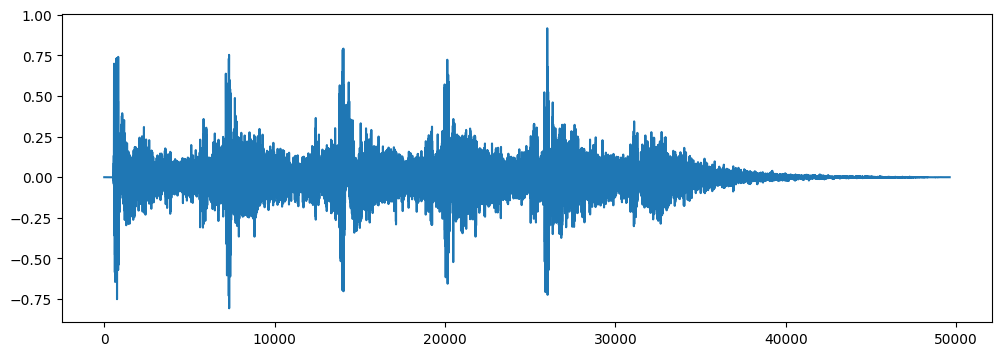

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [6]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

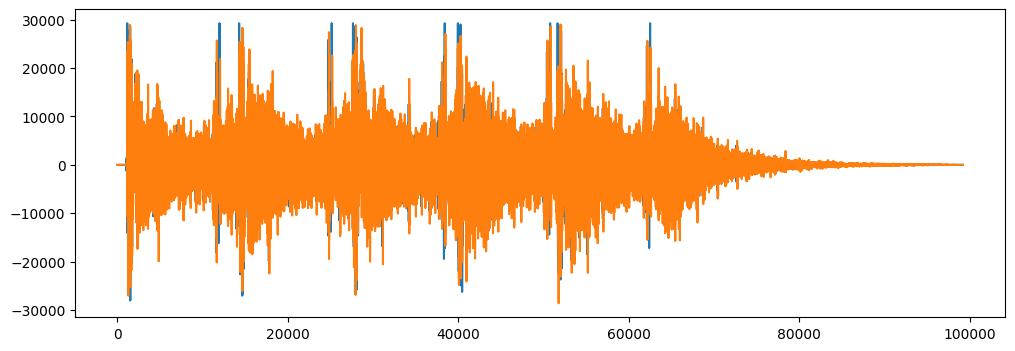

In [8]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [10]:
mfccs

array([[-1.2721312e+02,  8.0479221e+00,  1.6004412e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020668e+01,  2.2940346e+01,  1.0669682e+01, ...,
         4.3051193e+01,  2.5888042e+01,  1.2829788e+01],
       [-2.5360160e+00, -1.1252434e+01, -1.4259803e+01, ...,
        -1.1103722e+01, -7.5506268e+00,  2.0151812e-01],
       ...,
       [ 3.2335949e-01, -3.5481033e+00, -5.0293422e+00, ...,
         2.4095781e+00,  3.1699724e+00, -2.1270522e-01],
       [-9.7800560e+00, -9.0905132e+00, -6.1912651e+00, ...,
        -5.0198972e-02,  7.2895074e-01, -9.0055281e-01],
       [ 1.6566069e+00,  1.8223333e+00,  2.8306217e+00, ...,
        -2.0609212e+00, -2.2312660e+00, -1.7745872e+00]], dtype=float32)

In [11]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'D:\UrbanSound8K\audio'
metadata=pd.read_csv(r'D:\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [22]:
pip install resampy


   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/3.1 MB 6.5 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.1 MB 13.3 MB/s eta 0:00:01
   ----------------------------------- ---- 2.8/3.1 MB 19.5 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
metadata=pd.read_csv(r'D:\UrbanSound8K\metadata\UrbanSound8K.csv')
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])



3555it [08:12,  9.11it/s]C:\Users\Gnaneshwari\.conda\envs\tensorflow_env\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [18:24, 11.23it/s]C:\Users\Gnaneshwari\.conda\envs\tensorflow_env\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [18:24, 15.59it/s]C:\Users\Gnaneshwari\.conda\envs\tensorflow_env\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [19:17,  7.54it/s]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [19]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641270e-01,  7.33490765e-01,  7.11009264e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181704e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
X_train.shape

(6985, 40)

In [25]:
X_test.shape

(1747, 40)

In [26]:
y_train.shape

(6985, 10)

In [27]:
y_test.shape

(1747, 10)

### Model Creation

In [28]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [30]:
### No of classes
num_labels=y.shape[1]

In [31]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [34]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
212/219 [============================>.] - ETA: 0s - loss: 10.1135 - accuracy: 0.1167
Epoch 1: val_loss improved from inf to 2.28799, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 4s 13ms/step - loss: 9.9135 - accuracy: 0.1178 - val_loss: 2.2880 - val_accuracy: 0.0996
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 2.5677 - accuracy: 0.1235
Epoch 2: val_loss improved from 2.28799 to 2.28067, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 2.5652 - accuracy: 0.1238 - val_loss: 2.2807 - val_accuracy: 0.1139
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 2.3290 - accuracy: 0.1288
Epoch 3: val_loss improved from 2.28067 to 2.21285, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.3290 - accuracy: 0.1288 - val_loss: 2.2128 - val_accuracy: 0.1

202/219 [==========================>...] - ETA: 0s - loss: 0.8256 - accuracy: 0.7200
Epoch 00059: val_loss did not improve from 0.63746
219/219 [==============================] - 0s 2ms/step - loss: 0.8240 - accuracy: 0.7215 - val_loss: 0.6396 - val_accuracy: 0.7979
Epoch 60/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8444 - accuracy: 0.7186
Epoch 00060: val_loss did not improve from 0.63746
219/219 [==============================] - 0s 2ms/step - loss: 0.8435 - accuracy: 0.7185 - val_loss: 0.6671 - val_accuracy: 0.7853
Epoch 61/100
198/219 [==========================>...] - ETA: 0s - loss: 0.8411 - accuracy: 0.7208
Epoch 00061: val_loss did not improve from 0.63746
219/219 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.7214 - val_loss: 0.6507 - val_accuracy: 0.7956
Epoch 62/100
201/219 [==========================>...] - ETA: 0s - loss: 0.8107 - accuracy: 0.7253
Epoch 00062: val_loss did not improve from 0.63746
219/219 [===============

206/219 [===========================>..] - ETA: 0s - loss: 0.8426 - accuracy: 0.7221
Epoch 00088: val_loss did not improve from 0.63103
219/219 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.7231 - val_loss: 0.6475 - val_accuracy: 0.7939
Epoch 89/100
201/219 [==========================>...] - ETA: 0s - loss: 0.8247 - accuracy: 0.7284
Epoch 00089: val_loss did not improve from 0.63103
219/219 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.7248 - val_loss: 0.6569 - val_accuracy: 0.7934
Epoch 90/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8377 - accuracy: 0.7232
Epoch 00090: val_loss did not improve from 0.63103
219/219 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.7213 - val_loss: 0.6453 - val_accuracy: 0.7985
Epoch 91/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8140 - accuracy: 0.7306
Epoch 00091: val_loss did not improve from 0.63103
219/219 [===============

In [35]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7458500266075134


In [44]:
filename="D:/UrbanSound8K/audio/fold1/7061-6-0-0.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 104ms/step


array([[0.00773706, 0.21848989, 0.00804412, 0.04080621, 0.05081666,
        0.01567368, 0.00756148, 0.00867283, 0.00221607, 0.63998204]],
      dtype=float32)

In [45]:
prediction_feature.shape

(1, 40)

In [46]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673635  ,  -29.164494  ,  -18.950253  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630232  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009955  ,    0.5334609 ,  -23.84339   ,
        -15.267322  ,    9.245734  ,   10.367627  ,   -0.58320117,
         -1.2624055 ,   17.700018  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [48]:
model.predict(X_test)

55/55 [==============================] - 0s 4ms/step


array([[6.1301149e-02, 4.7878441e-04, 1.1160752e-02, ..., 1.4178535e-07,
        2.6774526e-04, 6.2734075e-02],
       [3.5975613e-03, 1.5938433e-02, 1.9406377e-01, ..., 5.6623662e-04,
        6.5894447e-02, 8.3571568e-02],
       [8.8001594e-05, 5.4296828e-03, 4.6096942e-03, ..., 6.1368454e-02,
        4.4080554e-04, 3.6960665e-02],
       ...,
       [1.5431739e-04, 7.2321594e-01, 6.9105365e-05, ..., 4.3616680e-07,
        1.3320027e-04, 2.6033154e-01],
       [1.0086475e-01, 1.1922695e-02, 4.5777941e-01, ..., 6.1742840e-03,
        2.8908486e-02, 1.8875389e-01],
       [3.2255182e-01, 4.6125641e-03, 2.0984223e-01, ..., 5.1741023e-04,
        1.0733207e-02, 1.5102130e-01]], dtype=float32)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [50]:
filename="D:/UrbanSound8K/audio/fold1/7061-6-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.65896027e+02  1.75781155e+01 -5.36057053e+01 -1.51742589e+00
 -1.30457602e+01  1.41432581e+01 -1.47124290e+01  1.95739269e+01
  3.20654273e+00  2.85464916e+01  1.36520605e+01  2.47587662e+01
 -8.33911228e+00  8.07833004e+00 -9.28243065e+00  1.60381470e+01
 -8.24212313e-01  7.21540332e-01 -1.36818848e+01  6.44546032e+00
 -3.14542007e+00  1.35105801e+00 -5.40863800e+00  1.17621250e+01
 -3.17880130e+00 -2.34746337e+00 -3.15520644e+00  1.10170116e+01
 -3.54585528e+00  2.16682792e+00  9.06558871e-01 -1.40850327e-03
 -3.31073356e+00  7.92290735e+00 -4.29051161e+00 -8.30401957e-01
  2.29045248e+00 -1.44527018e+00 -5.26783657e+00  3.23394465e+00]
[[-1.65896027e+02  1.75781155e+01 -5.36057053e+01 -1.51742589e+00
  -1.30457602e+01  1.41432581e+01 -1.47124290e+01  1.95739269e+01
   3.20654273e+00  2.85464916e+01  1.36520605e+01  2.47587662e+01
  -8.33911228e+00  8.07833004e+00 -9.28243065e+00  1.60381470e+01
  -8.24212313e-01  7.21540332e-01 -1.36818848e+01  6.44546032e+00
  -3.14542007e+00  

AttributeError: 'Sequential' object has no attribute 'predict_classes'